### Module 6: Communities in Social Networks

For the following graph:

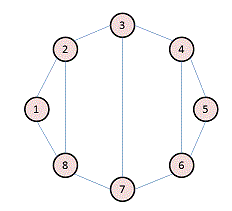

In [45]:
from IPython.display import Image
Image(filename='graph1.gif')

Write the adjacency matrix A, the degree matrix D, and the Laplacian matrix L. For each, find the sum of all entries and the number of nonzero entries.

In [46]:
import numpy as np

A = np.array([[0, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 1, 0, 0, 0, 0, 1],
              [0, 1, 0, 1, 0, 0, 1, 0],
              [0, 0, 1, 0, 1, 1, 0, 0],
              [0, 0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 1, 0],
              [0, 0, 1, 0, 0, 1, 0, 1],
              [1, 1, 0, 0, 0, 0, 1, 0]])

print('Sum of all entries in A: {}'.format(np.sum(A)))
print('Number of nonzero entries in A: {}'.format(np.count_nonzero(A)))

D = np.array([[2, 0, 0, 0, 0, 0, 0, 0],
              [0, 3, 0, 0, 0, 0, 0, 0],
              [0, 0, 3, 0, 0, 0, 0, 0],
              [0, 0, 0, 3, 0, 0, 0, 0],
              [0, 0, 0, 0, 2, 0, 0, 0],
              [0, 0, 0, 0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0, 0, 3, 0],
              [0, 0, 0, 0, 0, 0, 0, 3]])

print('Sum of all entries in D: {}'.format(np.sum(D)))
print('Number of nonzero entries in D: {}'.format(np.count_nonzero(D)))

L = D - A
      
print('Sum of all entries in L: {}'.format(np.sum(L)))
print('Number of nonzero entries in L: {}'.format(np.count_nonzero(L)))

Sum of all entries in A: 22
Number of nonzero entries in A: 22
Sum of all entries in D: 22
Number of nonzero entries in D: 8
Sum of all entries in L: 0
Number of nonzero entries in L: 30


Consider the following undirected graph (i.e., edges may be considered bidirectional):

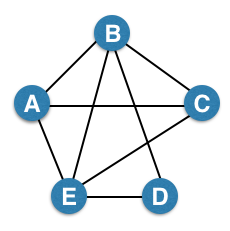

In [47]:
Image(filename='trawling.png')

Run the "trawling" algorithm for finding dense communities on this graph and find all complete bipartite subgraphs of types K3,2 and K2,2. Note: In the case of K2,2, we consider {{W, X}, {Y, Z}} and {{Y, Z}, {W, X}} to be identical.

In [48]:
from itertools import combinations
from collections import Counter

nodes = ['A', 'B', 'C', 'D', 'E']

baskets = [['B', 'C', 'E'],
           ['A', 'C', 'D', 'E'],
           ['A', 'B', 'E'],
           ['B', 'E'],
           ['A', 'B', 'C']]

variable_sets = [(3, 2), (2, 2)]

all_itemsets = [tuple(b) for b in baskets]

for basket in baskets:
    for i in range(1, len(basket)):
        combos = combinations(basket, i)
        all_itemsets.extend([c for c in combos])

itemset_counts = Counter(all_itemsets)

for support, num_items in variable_sets:
    for itemset in set(itemset_counts.elements()):
        if (
            len(itemset) == num_items and
            itemset_counts[itemset] >= support
        ):
            supporting_baskets = [
                nodes[idx]
                for idx, basket in enumerate(baskets)
                if all([item in basket for item in itemset])
            ]
            print('Support: {}, Itemset: {}'.format(supporting_baskets, itemset))

Support: ['A', 'C', 'D'], Itemset: ('B', 'E')
Support: ['A', 'B'], Itemset: ('C', 'E')
Support: ['A', 'E'], Itemset: ('B', 'C')
Support: ['B', 'E'], Itemset: ('A', 'C')
Support: ['B', 'C'], Itemset: ('A', 'E')
Support: ['C', 'E'], Itemset: ('A', 'B')
Support: ['A', 'C', 'D'], Itemset: ('B', 'E')


We fit AGM to the network on the left, and found the parameters on the right:

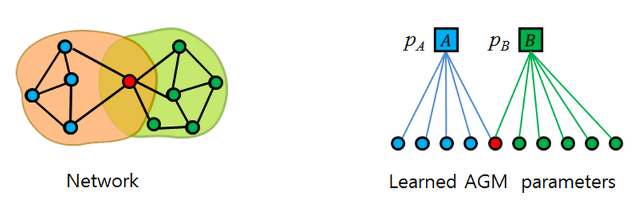

In [49]:
Image(filename='agm.png')

Find the optimal values for pA and pB.

In [50]:
# scipy function for N choose k
from scipy.special import comb

A_num_members = 5
A_num_edges = 7
A_num_possible_edges = comb(A_num_members, 2)
print('Optimal pA = {:,}'.format(A_num_edges / A_num_possible_edges))

B_num_members = 6
B_num_edges = 9
B_num_possible_edges = comb(B_num_members, 2)
print('Optimal pB = {:,}'.format(B_num_edges / B_num_possible_edges))

Optimal pA = 0.7
Optimal pB = 0.6
